In [82]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


In [83]:
# Definimos las tareas con sus tiempos optimista (to), más probable (tmp) y pesimista (tp)
tareas = {
    'T1': {'to': 1, 'tmp': 3, 'tp': 5},
    'T2': {'to': 2, 'tmp': 3, 'tp': 4},
    'T3': {'to': 4, 'tmp': 6, 'tp': 9},
    'T4': {'to': 4, 'tmp': 5, 'tp': 8},
    'T5': {'to': 1, 'tmp': 3, 'tp': 4},
    'T6': {'to': 1, 'tmp': 2, 'tp': 3},
    'T7': {'to': 4, 'tmp': 7, 'tp': 10},
    'T8': {'to': 5, 'tmp': 7, 'tp': 9},
    'T9': {'to': 5, 'tmp': 7, 'tp': 12},
    'T10': {'to': 1, 'tmp': 3, 'tp': 5},
    'T11': {'to': 7, 'tmp': 11, 'tp': 14},
    'T12': {'to': 0.5, 'tmp': 1, 'tp': 3},
    'T13': {'to': 0.5, 'tmp': 1, 'tp': 3},
    'T14': {'to': 7, 'tmp': 10, 'tp': 14},
    'T15': {'to': 1, 'tmp': 2, 'tp': 3},
    'T16': {'to': 2, 'tmp': 3, 'tp': 6}
}

# Definir los caminos del proyecto (listas de tareas)
caminos = [
    ['T1', 'T3', 'T5', 'T8','T11','T14','T15','T16'],  # Camino 1
    ['T1', 'T3', 'T5', 'T9','T14','T15','T16'],  # Camino 2
    ['T1', 'T3', 'T5', 'T7','T10','T12','T15','T16'],  # Camino 3
    ['T1', 'T3', 'T5', 'T7','T10','T13','T14','T15','T16'],  # Camino 4
    ['T2', 'T4', 'T6', 'T8','T11','T14','T15','T16'],  # Camino 5
    ['T2', 'T4', 'T6', 'T9','T14','T15','T16'],  # Camino 6
    ['T2', 'T4', 'T6', 'T7','T10','T12','T15','T16'],  # Camino 7
    ['T2', 'T4', 'T6', 'T7','T10','T13','T14','T15','T16'],  # Camino 8
]



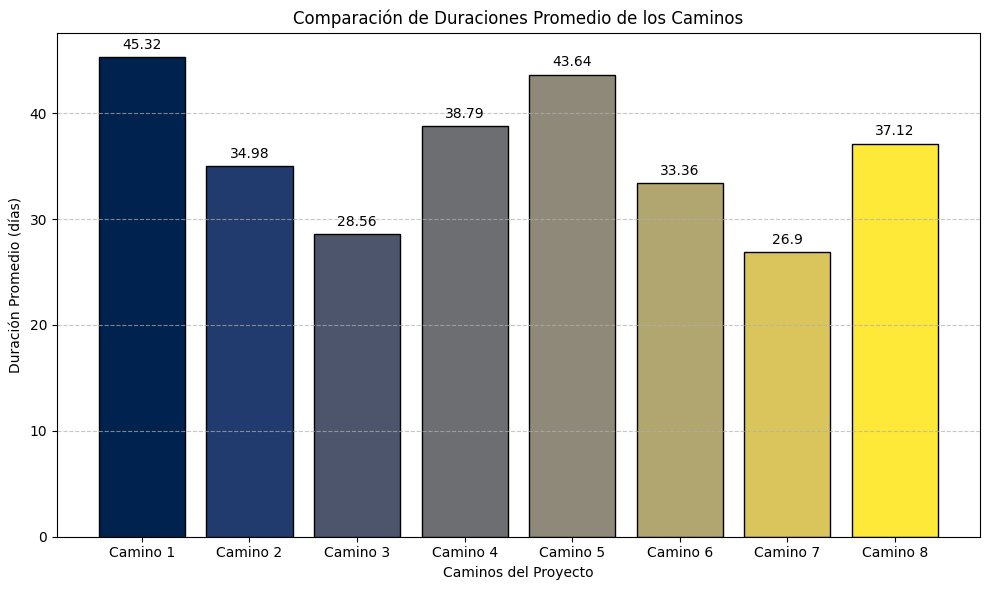

El camino más largo en promedio es: Camino 1


In [84]:
# Función para calcular la duración esperada y desviación estándar de cada tarea
def calcular_pert(to, tmp, tp):
    ET = (to + 4 * tmp + tp) / 6
    sigma = (tp - to) / 6
    return ET, sigma

# Calcular la duración esperada (E[T]) y la desviación estándar (sigma) de cada tarea
duraciones_esperadas = {}
desviaciones_estandar = {}

for tarea, tiempos in tareas.items():
    ET, sigma = calcular_pert(tiempos['to'], tiempos['tmp'], tiempos['tp'])
    duraciones_esperadas[tarea] = ET
    desviaciones_estandar[tarea] = sigma

# Número de simulaciones
n_simulaciones = 10000

# Lista para almacenar la duración total de cada camino en cada simulación
resultados_caminos = np.zeros((len(caminos), n_simulaciones))

# Realizar simulaciones Monte Carlo
for i in range(n_simulaciones):
    # Para cada camino, calcular la duración total
    for j, camino in enumerate(caminos):
        duracion_total = 0
        for tarea in camino:
            ET = duraciones_esperadas[tarea]
            sigma = desviaciones_estandar[tarea]
            # Generar una duración aleatoria usando una distribución normal (gaussiana)
            duracion_simulada = np.random.normal(ET, sigma)
            duracion_total += duracion_simulada
        resultados_caminos[j, i] = duracion_total

# Calcular las duraciones promedio de cada camino
duraciones_promedio = np.mean(resultados_caminos, axis=1)

# Contar cuántas veces cada camino fue el más largo
conteo_camino_mas_largo = np.zeros(len(caminos))

for i in range(n_simulaciones):
    camino_mas_largo = np.argmax(resultados_caminos[:, i])
    conteo_camino_mas_largo[camino_mas_largo] += 1

# Calcular el porcentaje de veces que cada camino fue el más largo
porcentaje_camino_mas_largo = (conteo_camino_mas_largo / n_simulaciones) * 100

# Graficar los resultados, con la paleta de colores cividis
plt = mp.pyplot
colors = mp.cm.cividis(np.linspace(0, 1, len(caminos)))  # Paleta de colores

plt.figure(figsize=(10, 6))
bars = plt.bar([f'Camino {i+1}' for i in range(len(caminos))], duraciones_promedio, color=colors, edgecolor='black')

# Añadir etiquetas y valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Gráfico
plt.xlabel('Caminos del Proyecto')
plt.ylabel('Duración Promedio (días)')
plt.title('Comparación de Duraciones Promedio de los Caminos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprimir el camino que tarda más en promedio
camino_mas_largo = np.argmax(duraciones_promedio)
print(f'El camino más largo en promedio es: Camino {camino_mas_largo + 1}')


<Figure size 1000x600 with 0 Axes>

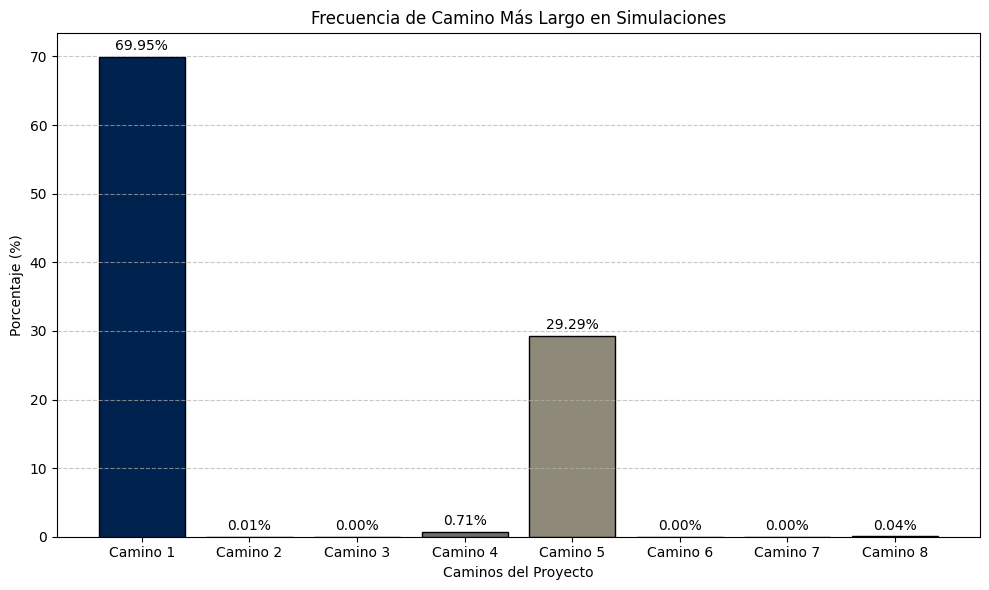

Camino 1 fue el más largo en 69.95% de las simulaciones.
Camino 2 fue el más largo en 0.01% de las simulaciones.
Camino 3 fue el más largo en 0.00% de las simulaciones.
Camino 4 fue el más largo en 0.71% de las simulaciones.
Camino 5 fue el más largo en 29.29% de las simulaciones.
Camino 6 fue el más largo en 0.00% de las simulaciones.
Camino 7 fue el más largo en 0.00% de las simulaciones.
Camino 8 fue el más largo en 0.04% de las simulaciones.


In [85]:
plt.figure(figsize=(10, 6))

# Graficar el porcentaje de veces que cada camino fue el más largo
plt.figure(figsize=(10, 6))

# Gráfico: Porcentaje de veces que cada camino fue el más largo
bars2 = plt.bar([f'Camino {i+1}' for i in range(len(caminos))], porcentaje_camino_mas_largo, color=colors, edgecolor='black')
plt.xlabel('Caminos del Proyecto')
plt.ylabel('Porcentaje (%)')
plt.title('Frecuencia de Camino Más Largo en Simulaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas y valores en las barras
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar el porcentaje de veces que cada camino fue el más largo
for i, porcentaje in enumerate(porcentaje_camino_mas_largo):
    print(f'Camino {i+1} fue el más largo en {porcentaje:.2f}% de las simulaciones.')